In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [6]:
## import some basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:

dataset=pd.read_csv("/content/churn.csv")

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## Divided the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y= dataset.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
##feature Engineeing
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [13]:
#Concatenate these variables with dataframe
X=X.drop(["Geography","Gender" ],axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X=pd.concat([X,geography,gender],axis=1)

In [16]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
X_train.shape

(8000, 11)

In [46]:
## Parts 2 to create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [51]:
##Lets initialize the ANN
classifier=Sequential()

In [52]:
##Adding the input Layer
classifier.add(Dense(units=11,activation="relu"))


In [53]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [54]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))


In [55]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [56]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=["accuracy"])

In [57]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [58]:
##Early Stoping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4687 - accuracy: 0.8046 - val_loss: 0.4018 - val_accuracy: 0.8330
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4086 - accuracy: 0.8349 - val_loss: 0.3815 - val_accuracy: 0.8402
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3964 - accuracy: 0.8354 - val_loss: 0.3820 - val_accuracy: 0.8417
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3955 - accuracy: 0.8367 - val_loss: 0.3826 - val_accuracy: 0.8387
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3951 - accuracy: 0.8380 - val_loss: 0.3960 - val_accuracy: 0.8209
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3906 - accuracy: 0.8393 - val_loss: 0.3701 - val_accuracy: 0.8432
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3804 - accuracy: 0.8440 - val_loss: 0.3877 - val_accuracy:

In [ ]:
model_history.history.keys()

In [ ]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

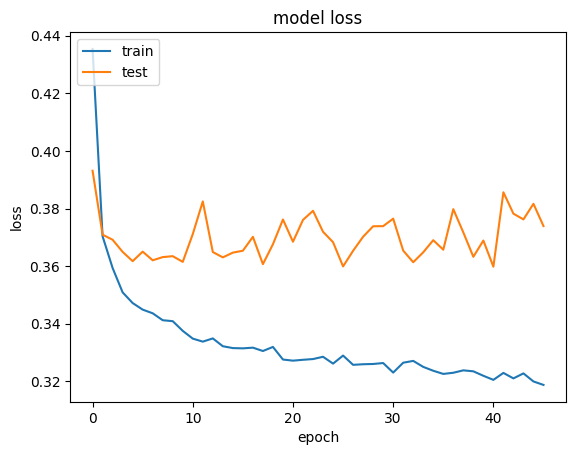

In [36]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [37]:
## part 3 - making the predications and evaluating the model

## Predicting the Test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >-0.5)

63/63 [==============================] - 0s 1ms/step


In [38]:
## make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[   0, 1595],
       [   0,  405]])

In [41]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [42]:
score

0.2025

In [43]:
## get the weights
classifier.get_weights()

[array([[ 0.01182079, -1.3655053 , -0.82143354, -0.28766188,  0.21083388,
         -0.9812977 , -0.26492807,  0.1453723 , -0.22425775, -0.3785783 ,
          0.636451  ],
        [-2.1757822 ,  0.7149949 ,  0.9782338 ,  3.2824075 , -0.71469855,
         -2.2169542 ,  2.2102056 , -1.1631198 ,  3.1410885 ,  0.4753304 ,
         -0.11683784],
        [-0.04029482,  0.36687258, -0.4469693 , -0.45898184,  1.0778433 ,
         -0.920058  , -0.6943494 , -0.25472024,  0.27106884,  0.33023623,
          0.46632662],
        [-1.6099515 , -1.2255598 ,  0.6351947 ,  0.35870016, -2.5813236 ,
          0.97209775, -0.1864588 ,  0.0524388 , -0.25418177, -3.5464728 ,
         -3.5342305 ],
        [-0.6369379 , -0.40304348,  3.987036  , -1.3037807 ,  3.3277178 ,
         -0.6236412 ,  0.2965218 ,  2.7541444 ,  2.6411026 , -1.901177  ,
          0.33059496],
        [-0.26036695, -0.5468619 , -0.48144832, -1.205671  ,  0.3134541 ,
         -0.64072305, -0.3184684 , -2.1322825 , -0.46902522,  0.2251017